Dataset originates here https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant
Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [1]:
import pandas as pd
import numpy as np


In [2]:
filename = './power_plant_ds.csv'
pp_df = pd.read_csv(filename)

Exploring dataset

In [3]:
pp_df.info()
pp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
pp_df.shape

(9568, 5)

9568 rows
5 columns

In [5]:
pp_df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

All columns are integers

In [7]:
pp_df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


checking for duplicates and dropping them

In [9]:
pp_df.duplicated().sum()

41

In [10]:
pp_df = pp_df.drop_duplicates()

pp_df.duplicated().sum()

0

checking for null values

In [11]:
pp_df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

is their a correlation between our columns

In [14]:
power_corr = pp_df.corr()
power_corr

,AT,V,AP,RH,PE
AT,1.000000,0.843689,-0.508222,-0.543947,-0.947908
V,0.843689,1.000000,-0.415718,-0.312214,-0.869900
AP,-0.508222,-0.415718,1.000000,0.101631,0.518687
RH,-0.543947,-0.312214,0.101631,1.000000,0.391175
PE,-0.947908,-0.869900,0.518687,0.391175,1.000000


<AxesSubplot:>

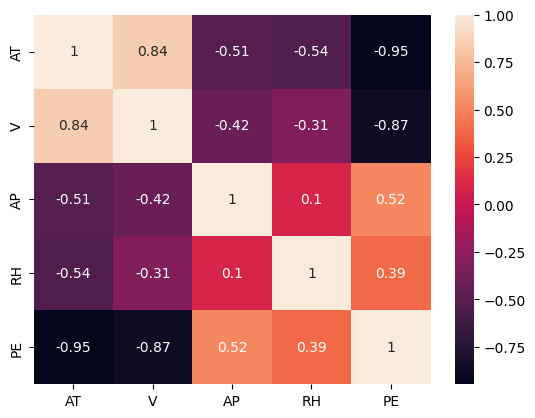

In [15]:
import seaborn as sns
sns.heatmap(power_corr, annot=True)



strongest correlations are electrical energy output and temperature, and electrical energy output and exhaust vacuum

Define X (independent features) and y (target)


In [17]:
target = 'PE'
X = pp_df.drop(columns=target)
y = pp_df[target]


Split the dataset in training and testing set

In [19]:
## import required packages
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [20]:
X_train.shape

(7145, 4)

In [21]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

LinearRegression()

Predict the test set results

In [22]:
y_predict = reg_model.predict(X_test)
print(y_predict)

[427.43087215 481.10671396 482.63835939 ... 453.74567089 476.87402855
 455.5514791 ]


Evaluate our predictions with R2-score, MAE, MSE, RMSE

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9297677280023562

r2 score is 93% 

Plot the results

Text(0.5, 1.0, 'Actual vs PRedicted')

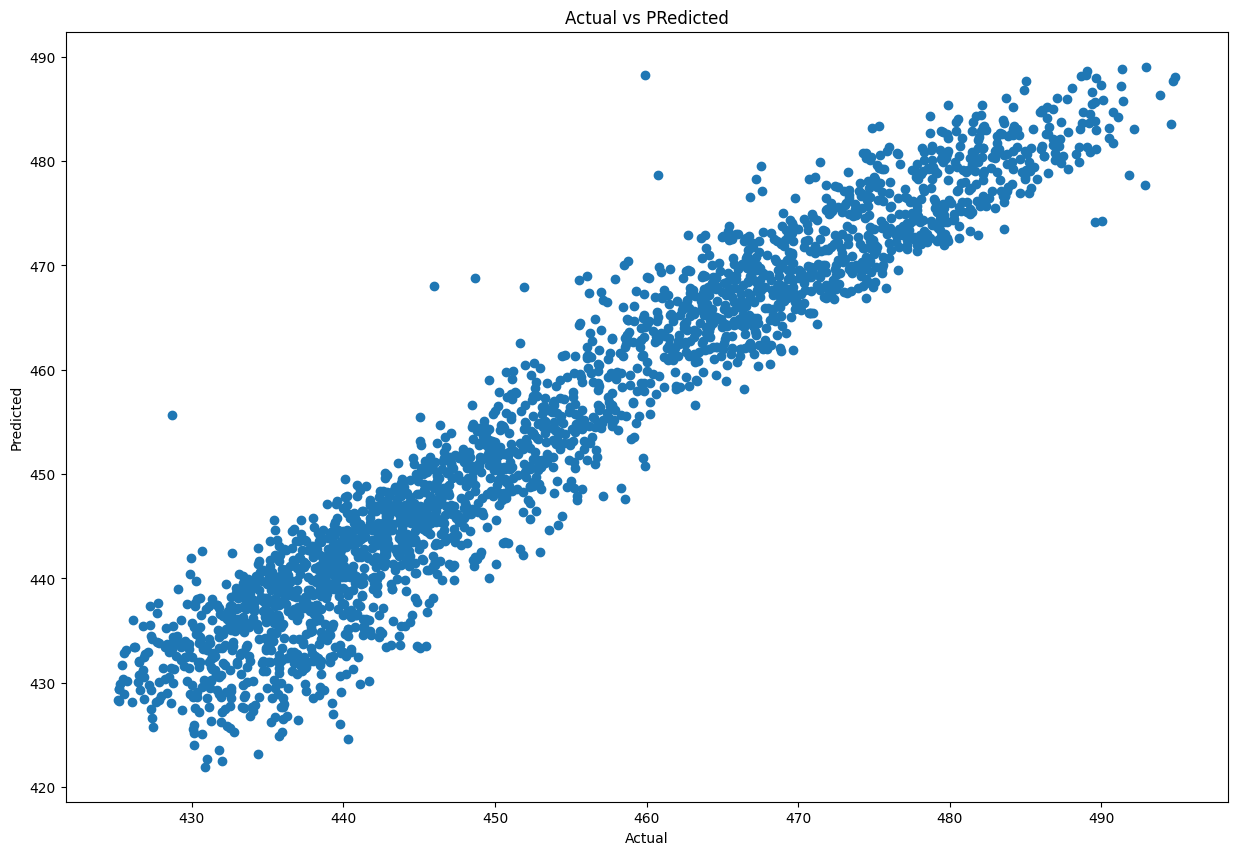

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs PRedicted')


In [24]:
pred_y_df = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_predict, 'Difference' : y_test - y_predict})
pred_y_df

,Actual Value,Predicted Value,Difference
1087,429.38,427.430872,1.949128
6319,485.29,481.106714,4.183286
8052,480.40,482.638359,-2.238359
9524,452.30,450.447546,1.852454
4463,446.47,447.682287,-1.212287
...,...,...,...
4380,437.97,438.273626,-0.303626
56,481.91,476.678831,5.231169
5751,450.81,453.745671,-2.935671
7970,475.91,476.874029,-0.964029
